===========Done!===============
===========Done!===============
===========Done!===============
===========Done!===============
===========Done!===============
===========Done!===============
===========Done!===============
===========Done!===============
===========Done!===============


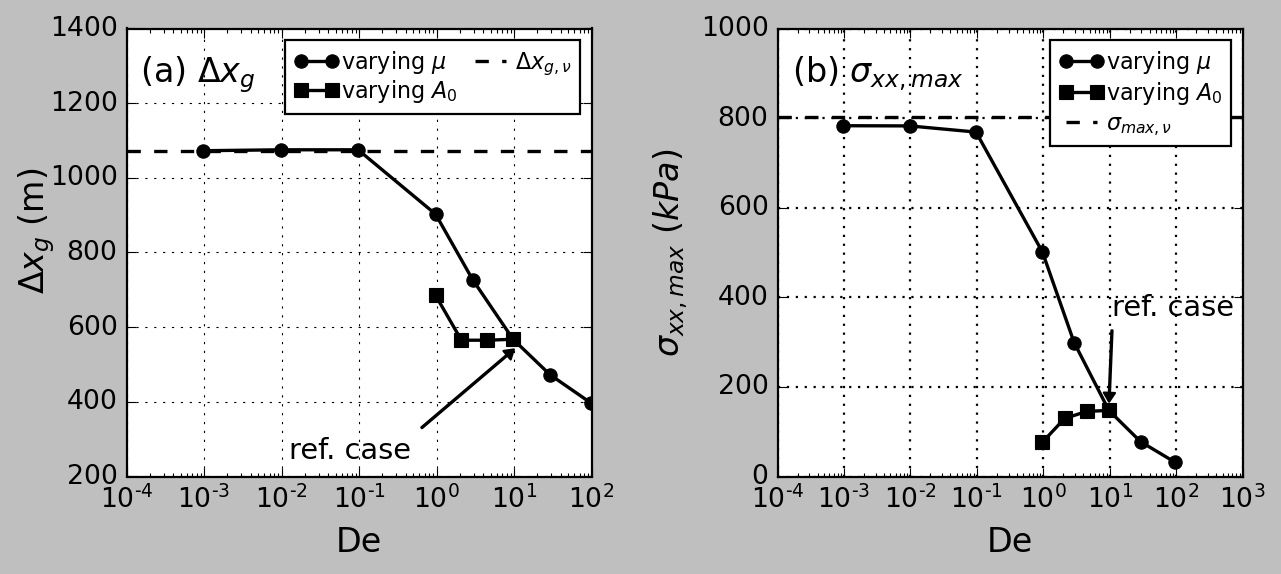

In [ ]:
#======================= import essential libraries ===========================
import os
import math
import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.signal import find_peaks
from scipy.integrate import simps 

#======================= input parameters  ===========================
Hght = 500               # Height(m)
Lngth = 2e4              # Lngth(m)               
tol = 1e-3               # Tolerance(m)
T = 0.5*3.154e7/(12.0*30.0)  # lunar tide period
sea_level = Hght*0.917   # sea level(m)
r_lake = 0.5e3           # lake redius
KIc = 1e5                # Ice fracture toughness
rho_w = 1e3              # water density (kg/m^3)
rho_i = 917              # ice density (kg/m^3)
g = 9.8 # m/s^2          # gravity (m/s^2)
pi=math.pi               # pi
basin_elev = 80.0        # basin_elevation (m)
depth_basin = 90.0 - basin_elev  # basin depth (m)

eps_v = 1.0e-18 
vA0 = np.array([1.2e-22,1.2e-23,1.2e-24,1.2e-25])                       # Glen's law coefficient (ice softness, Pa^{-n}/s)
n = 3.0                            # Glen's law exponent
rm2 = 1 + 1.0/n - 2.0              # Exponent in variational forms: r-2
rm2_s = -2.0/3.0                   # Exponent in sliding law
vB0 = vA0**(-1/n)                    # Ice hardness (Pa s^{1/n})
vB = (2**((n-1.0)/(2*n)))*vB0        # "2*Viscosity" constant in weak form (Pa s^{1/n})
mu = 0.30e9                        # Shear modulus (Pa)
veta = 0.5*vB*(eps_v)**(rm2/2.0)

eps_v = 1.0e-18 
A0 = 1.2e-25                       # Glen's law coefficient (ice softness, Pa^{-n}/s)
n = 3.0                            # Glen's law exponent
rm2 = 1 + 1.0/n - 2.0              # Exponent in variational forms: r-2
rm2_s = -2.0/3.0                   # Exponent in sliding law
B0 = A0**(-1/n)                    # Ice hardness (Pa s^{1/n})
B = (2**((n-1.0)/(2*n)))*B0        # "2*Viscosity" constant in weak form (Pa s^{1/n})
mu = 0.30e9                        # Shear modulus (Pa)
eta = 0.5*B*(eps_v)**(rm2/2.0)

# plot settings
fs = 15
marker = 6               # MarkerType
ny=1e4                   # y grid resolution

#======================= read data ===========================
# cases to be included
vfile_mu =['../results/stokes_tidal_response_U17ma_L20000_Slope2e_2_A1e_25_n3_0_mu0_30e8_deltap1e_14_deltav1e_18_C1_2e7_DX25_tide1_00',\
        '../results/stokes_tidal_response_U17ma_L20000_Slope2e_2_A1e_25_n3_0_mu0_10e9_deltap1e_14_deltav1e_18_C1_2e7_DX25_tide1_00',\
        '../results/stokes_tidal_response_U17ma_L20000_Slope2e_2_A1e_25_n3_0_mu0_30e9_deltap1e_14_deltav1e_18_C1_2e7_DX25_tide1_00',\
        '../results/stokes_tidal_response_U17ma_L20000_Slope2e_2_A1e_25_n3_0_mu0_10e10_deltap1e_14_deltav1e_18_C1_2e7_DX25_tide1_00',\
        '../results/stokes_tidal_response_U17ma_L20000_Slope2e_2_A1e_25_n3_0_mu0_30e10_deltap1e_14_deltav1e_18_C1_2e7_DX25_tide1_00',\
        '../results/stokes_tidal_response_U17ma_L20000_Slope2e_2_A1e_25_n3_0_mu0_30e11_deltap1e_14_deltav1e_18_C1_2e7_DX25_tide1_00',\
        '../results/stokes_tidal_response_U17ma_L20000_Slope2e_2_A1e_25_n3_0_mu0_30e12_deltap1e_14_deltav1e_18_C1_2e7_DX25_tide1_00',\
        '../results/stokes_tidal_response_U17ma_L20000_Slope2e_2_A1e_25_n3_0_mu0_30e13_deltap1e_14_deltav1e_18_C1_2e7_DX25_tide1_00',\
        '../results/stokes_tidal_response_U17ma_L20000_Slope2e_2_A1e_25_n3_0_deltap1e_14_deltav1e_18_C1_2e7_DX25_tide1_00']

vfile_nu = ['../results/stokes_tidal_response_U17ma_L20000_Slope2e_2_A1e_22_n3_0_mu0_30e9_deltap1e_13_deltav1e_18_C1_2e7_DX25_tide1_00',\
         '../results/stokes_tidal_response_U17ma_L20000_Slope2e_2_A1e_23_n3_0_mu0_30e9_deltap1e_13_deltav1e_18_C1_2e7_DX25_tide1_00',\
         '../results/stokes_tidal_response_U17ma_L20000_Slope2e_2_A1e_24_n3_0_mu0_30e9_deltap1e_13_deltav1e_18_C1_2e7_DX25_tide1_00',\
        #  '../results/stokes_tidal_response_U17ma_L20000_Slope2e_2_A8e_25_n3_0_mu0_30e9_deltap1e_13_deltav1e_18_C1_2e7_DX25_tide1_00',\
        #  '../results/stokes_tidal_response_U17ma_L20000_Slope2e_2_A3e_25_n3_0_mu0_30e9_deltap1e_13_deltav1e_18_C1_2e7_DX25_tide1_00',\
         '../results/stokes_tidal_response_U17ma_L20000_Slope2e_2_A1e_25_n3_0_mu0_30e9_deltap1e_14_deltav1e_18_C1_2e7_DX25_tide1_00']
        
# correct the name of results
for file in vfile_mu:
    path =  file + "/line_plot_data"
    # print "name :", os.listdir(path)
    listName = os.listdir(path)
    for files in listName:
        if files[-4:]=='.txt':
            continue
        else:
            txtName = files + '.txt'
            os.rename(os.path.join(path,files), os.path.join(path,txtName))
    print ("===========Done!===============")

X = [] # list of xcoord
x_left_mu = []
x_right_mu = []
s_mean_mu = []
h_mean_mu = []
max_tension_mu = []
max_tension_net_mu = []

X = [] # list of xcoord
x_left_nu = []
x_right_nu = []
s_mean_nu = []
h_mean_nu = []
max_tension_nu = []
max_tension_net_nu = []

t =  np.loadtxt(vfile_mu[2] + "/line_plot_data/t.txt", dtype='f', delimiter=' ')
max_row = np.shape(t)[0]
max_row = 2400

for file in vfile_mu:
    # X.append(np.loadtxt( file + "/line_plot_data/X.txt", dtype='f', delimiter=' ',max_rows=max_row))
    x_left_mu.append(np.loadtxt( file + "/line_plot_data/x_left.txt", dtype='f', delimiter=' ',max_rows=max_row))
    x_right_mu.append(np.loadtxt( file + "/line_plot_data/x_right.txt", dtype='f', delimiter=' ',max_rows=max_row))
    # s_mean_mu.append(np.loadtxt( file + "/line_plot_data/s_mean.txt", dtype='f', delimiter=' ',max_rows=max_row))
    # h_mean_mu.append(np.loadtxt( file + "/line_plot_data/h_mean.txt", dtype='f', delimiter=' ',max_rows=max_row))
    max_tension_net_mu.append(np.loadtxt( file + "/max_tension_net.txt", dtype='f', delimiter=' ',max_rows=max_row))
    # max_tension_mu.append(np.loadtxt( file + "/max_tension.txt", dtype='f', delimiter=' ',max_rows=max_row))

for file in vfile_nu:
    # X.append(np.loadtxt( file + "/line_plot_data/X.txt", dtype='f', delimiter=' ',max_rows=max_row))
    x_left_nu.append(np.loadtxt( file + "/line_plot_data/x_left.txt", dtype='f', delimiter=' ',max_rows=max_row))
    x_right_nu.append(np.loadtxt( file + "/line_plot_data/x_right.txt", dtype='f', delimiter=' ',max_rows=max_row))
    # s_mean_nu.append(np.loadtxt( file + "/line_plot_data/s_mean.txt", dtype='f', delimiter=' ',max_rows=max_row))
    # h_mean_nu.append(np.loadtxt( file + "/line_plot_data/h_mean.txt", dtype='f', delimiter=' ',max_rows=max_row))
    max_tension_net_nu.append(np.loadtxt( file + "/max_tension_net.txt", dtype='f', delimiter=' ',max_rows=max_row))
    # max_tension_nu.append(np.loadtxt( file + "/max_tension.txt", dtype='f', delimiter=' ',max_rows=max_row))

vlambda = veta/mu
vDe_nu = vlambda/T

vmu = np.array([0.3e8,1e8,0.3e9,1e9,0.3e10,0.3e11,0.3e12,0.3e13])
vlambda = eta/vmu
vDe = vlambda/T

# =========================== figure =========================== 
fig,ax = plt.subplots(figsize=(9,3.5),nrows=1,ncols=2, constrained_layout=False)
plt.rcParams["figure.dpi"] = 300
plt.style.use('classic')
%config InlineBackend.figure_format = 'retina' # make high res plots for retina 5k displays

# range of the time
na = np.argmin(np.abs(t/T-0.0))               
nb = np.argmin(np.abs(t/T-19.0)) 
labels = ['(a) mu=0.3e8','(b) mu=1e8','(b) mu=0.3e9','(c) mu=1e9','(d) mu=0.3e10','(e) viscous']
vcolor = ['k','y','b','r','g']
# =================== (a) ======================
ax = plt.subplot(121)
count =0
xr_range_mu = []
xl_range_mu = []
for i,file in enumerate(vfile_mu):
    xr_range_mu.append(x_right_mu[i][na:nb].max())
    xl_range_mu.append(x_left_mu[i][na:nb].min())
    count += 1
xr_range_mu = np.array(xr_range_mu)
xl_range_mu = np.array(xl_range_mu)
delta_xg_mu = xr_range_mu-xl_range_mu

xr_range_nu = []
xl_range_nu = []
for i,file in enumerate(vfile_nu):
    xr_range_nu.append(x_right_nu[i][na:nb].max())
    xl_range_nu.append(x_left_nu[i][na:nb].min())
    count += 1
xr_range_nu = np.array(xr_range_nu)
xl_range_nu = np.array(xl_range_nu)
delta_xg_nu = xr_range_nu-xl_range_nu

ax.plot(vDe,delta_xg_mu[:-1],'-',color='k',linewidth = 1.5,marker='o',markersize=6,label=r'varying $\mu$') # ,label=r'$\Delta x_g$'    
ax.plot(vDe_nu,delta_xg_nu,'-',color='k',linewidth = 1.5,marker='s',markersize=6,label=r'varying $A_0$') # ,label=r'$\Delta x_g$'    

# viscous solution
ax.axhline(y=delta_xg_mu[-1],xmin=0,xmax=3e12,linewidth=1.5,linestyle='--',color='k',label=r'$\Delta x_{g,\nu}$')

ax.annotate(r'ref. case',xy=(vDe[2]*1.2,delta_xg_mu[2]-15),xytext=(0.35,0.04), xycoords='data', textcoords='axes fraction',\
            fontsize=fs-2, math_fontfamily='dejavusans',\
            arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=5, headlength=4),)

ax.set_xscale('log')
# ax.set_yscale('log')

ax.set_ylim([200,1400])
ax.set_ylabel(r'$\Delta x_g$ (m)', math_fontfamily='dejavusans',fontsize = fs)
ax.yaxis.set_label_coords(-.15, .55)

ax.set_xlabel(r'De',fontsize = fs, math_fontfamily='dejavusans')
font = font_manager.FontProperties(math_fontfamily='dejavusans',
                                   style='normal', size=fs-5)
lgd = ax.legend(loc="upper right",ncol=2,prop=font,\
                fontsize=fs-2,labelspacing = 0.1,markerscale=1,handletextpad=0.1,columnspacing=0.5)

ax.grid(True,linewidth=0.5)
ax.annotate('(a) $\Delta x_g$',xy=(0.03,0.88),xycoords='axes fraction',fontsize=fs, math_fontfamily='dejavusans')

# =================== (b) ======================
ax = plt.subplot(122)
count =0
sigma_mu = []
for i,file in enumerate(vfile_mu):
    peaks_mu, _ = find_peaks(max_tension_net_mu[i],width=5)
    sigma_max_mu = max_tension_net_mu[i][peaks_mu].mean()
    # sigma_max = np.max(max_tension_net[i][na:nb])
    sigma_mu.append(sigma_max_mu)
    count += 1
sigma_mu = np.array(sigma_mu)
ax.plot(vDe,sigma_mu[:-1]/1e3,'-',color=vcolor[0],linewidth = 1.5,marker='o',label=r'varying $\mu$')    

sigma_nu = []
for i,file in enumerate(vfile_nu):
    peaks_nu, _ = find_peaks(max_tension_net_nu[i],width=5)
    sigma_max_nu = max_tension_net_nu[i][peaks_nu].mean()
    # sigma_max = np.max(max_tension_net[i][na:nb])
    sigma_nu.append(sigma_max_nu)
    count += 1
sigma_nu = np.array(sigma_nu)
ax.plot(vDe_nu,sigma_nu/1e3,'-',color=vcolor[0],linewidth = 1.5,marker='s',label=r'varying $A_0$')    

# viscous solution
ax.axhline(y=sigma_mu[-1]/1e3,xmin=0,xmax=3e12,linewidth=1.5,linestyle='--',color='k',label=r'$\sigma_{max,\nu}$')
ax.annotate(r'ref. case',xy=(vDe[2],sigma_mu[2]/1e3+10),xytext=(0.72,0.36), xycoords='data', textcoords='axes fraction',\
            fontsize=fs-2, math_fontfamily='dejavusans',\
            arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=5, headlength=4),)

# y-axis
ax.set_ylim([0,1000])
ax.set_ylabel(r'$\sigma_{xx,max}~(kPa)$',math_fontfamily='dejavusans',fontsize = fs)

# x-axis
ax.set_xlim([1e-4,1e3])
ax.set_xscale('log')
ax.set_xlabel(r'De',fontsize = fs, math_fontfamily='dejavusans')

ax.grid(True,linewidth=1) # grid
ax.annotate('(b) $\sigma_{xx,max}$',xy=(0.03,0.88),xycoords='axes fraction',fontsize=fs, math_fontfamily='dejavusans')

font = font_manager.FontProperties(math_fontfamily='dejavusans',
                                   style='normal', size=fs-5)
lgd = ax.legend(loc="upper right",ncol=1,prop=font,\
                fontsize=fs-2,labelspacing = 0.2,markerscale=1,handletextpad=0.1,columnspacing=0.5)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.40, hspace=0.2)

plt.savefig('../figures/figure_4.jpeg',bbox_inches='tight',dpi=300)
# plt.savefig('../figures/figure_4(high-resolution).tiff',bbox_inches='tight',dpi=600)